# Markdown Cell Example 
markdown can be readibly interleaved and dispersed between code in notebooks 
## Explanation of code below
The histogram (x-axis) binned readability score, (y-axis) counts of papers that occupy that readability score. 

The histogram is initially populated exclusively by the ART corpus, but the idea was every time a new author got scraped from scholar, it would be added in, such that with each persons new search our big picture of science readability would be better informed.

So the histogram changes a little modestly perceptible amount with the author scrape, but three dots pertaining to the authors easiest read, hardest read, and mean read where added.

These used to be ```[mean-standard dev, mean, mean+standard dev]``` but there was a flaw implementing that. It could just be that the plot looked way too busy around the mean, and it was harder to look at.

There is an issue with getting the dots to appear in the centre of histogram bins. I was working under the assumption, that if I knew the ```[min,mean,max]```, readability scores for Rick Gerkin, I could add to them half the bin width, and dot's would be centred. That is almost correct. I forgot that these calculations are not performed on pre binned data, so the x-coordinates of ```[min,mean,max]``` need to be slightly shifted to the nearest histogram bin start first.

Think of it as a bit like snapping something to a grid in photoshop.

It should be easy to hack this code to run off a local machine, using sudo.
Set up the Environment. This is now done in requirements, and the postBuild script.
```python
!pip install matplotlib
!pip install pandas
!pip install seaborn

if os.path.exists('traingDats.p?dl=0'):
    pass

else:
    !wget https://www.dropbox.com/s/3h12l5y2pn49c80/traingDats.p?dl=0
    !wget https://www.dropbox.com/s/crarli3772rf3lj/more_authors_results.p?dl=0
    !wget https://www.dropbox.com/s/x66zf52himmp5ox/benchmarks.p?dl=0
```

In [1]:
#!pip install tabulate
import pickle
try:
    [rg,sc,gn,sb,all_authors] = pickle.load(open('competition_data.p?dl=0','rb'))

except:
    !wget https://www.dropbox.com/s/04nd2ww4vg4jzt6/competition_data.p?dl=0
    [rg,sc,gn,sb,all_authors] = pickle.load(open('competition_data.p?dl=0','rb'))


     |████████████████████████████████| 51kB 2.3MB/s eta 0:00:011
  Created wheel for tabulate: filename=tabulate-0.8.5-cp37-none-any.whl size=23257 sha256=05834d8eb37fd94ecaa4ccaa53d6b8a61bf3431a5509377c06a69700c9577f38
  Stored in directory: /home/jovyan/.cache/pip/wheels/e1/41/5e/e201f95d90fc84f93aa629b6638adacda680fe63aac47174ab
Successfully built tabulate


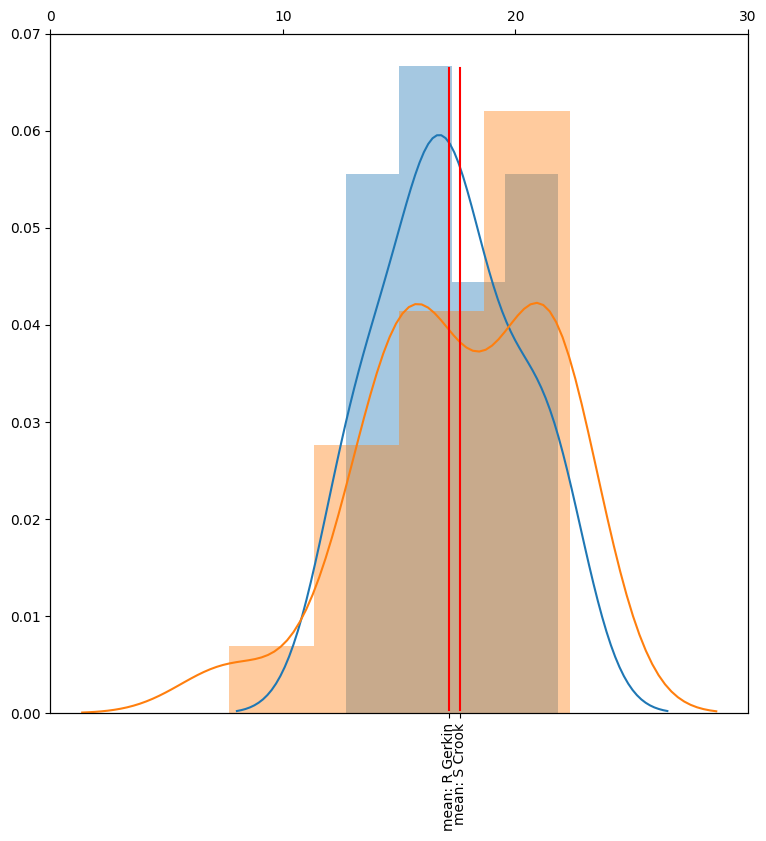

In [45]:
fig = plt.figure(figsize=(9, 9), dpi=100)
ax1 = fig.add_subplot(111)#)
#g = sns.distplot(standard_sci, label="Readability Index")
stdrg = [r['standard'] for r in rg]
stdsc = [r['standard'] for r in sc]
stdgn = [r['standard'] for r in gn]
stdgn = [r['standard'] for r in gn]

g = sns.distplot(stdrg, label="Readability Index")
g = sns.distplot(stdsc, label="Readability Index")
#g = sns.distplot(stdgn, label="Readability Index")
len(stdrg)
len(stdsc)
plt.axvline(np.mean(stdrg), 0.004,0.95,c='r')
plt.axvline(np.mean(stdsc), 0.004,0.95,c='r')

ax2 = plt.twiny()
xticks = list(range(0,40,10))


xinterval = [np.mean(stdrg),np.mean(stdsc)]
#xinterval.extend(bmark_stats_items_grid)
#xinterval.append(other)
#coords = copy.copy([item for item in ax.get_xticklabels()])
#xinterval.insert(4,x1)
ax1.set_xticks(xinterval)
ax2.set_xticks(xticks)



ax1.set_xticklabels(['mean: R Gerkin','mean: S Crook'], minor=False, rotation=90)
#ax1.set_xticklabels([], minor=True, rotation=0)

plt.show()

In [2]:

def metricss(rg):
    if isinstance(rg,list):
        pub_count = len(rg)
        standard = np.mean([ r['standard'] for r in rg ])
        return standard
    else:
        return None
def metricsp(rg):
    if isinstance(rg,list):
        pub_count = len(rg)
        penalty = np.mean([ r['penalty'] for r in rg ])
        stds = np.std([ r['penalty'] for r in rg ])

        #penalty = np.mean([ r['perplexity'] for r in rg ])

        return stds
    else:
        return None

def filter_empty(the_list):
    the_list = [ tl for tl in the_list if tl is not None ]
    return [ tl for tl in the_list if 'standard' in tl.keys() ]


import pickle
import copy
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly as py

rick = metricss(rg)
scrook = metricss(sc)
grayden = metricss(gn)
#bhenderson = metricss(bh)
#emarder = metricss(em)
#markram = metricss(mk)
smbaer = metricss(sb)

rank = [(rick,str('rick')),(scrook,str('sharon')),(grayden,str('grayden'))]
print('the winner of the science clarity competition is: ', sorted(rank)[0])
#pdb.set_trace()

print(rank)
print(rick,scrook,grayden,smbaer)
ricks = metricsp(rg)
scrooks = metricsp(sc)
graydens = metricsp(gn)
#smbaer = metricsp(sb)

#emarder = metricsp(em)
#markram = metricsp(mk)
print('penalties: rick,scrook,grayden,bryan hen,emarder,markram')
#print(rick,scrook,grayden,bhen,emarder,markram)

# Some random data
#data = np.random.rand(10,4)
# Columns A, B, C, D
#columns = [chr(x) for x in range(65,69)]
# Create the dataframe
data_m = [{"R. Gerkin":rick},{"S. Crook":scrook},{"D. Grayden":grayden}]#,{"S. Baer":smbaer}]
data_s = [{"R. Gerkin":ricks},{"S. Crook":scrooks},{"D. Grayden":graydens}]#,{"S. Baer":smbaer}]

df = pd.DataFrame(data_m)
df.T
#,columns=columns)
# Optionally give the dataframe's index a name
#df.index.name = "my_index"
# Create the markdown string
#md = tabulate(df, headers='keys', tablefmt='pipe')
# Fix the markdown string; it will not render with an empty first table cell,
# so if the dataframe's index has no name, just place an 'x' there.
#md = md.replace('|    |','| %s |' % (df.index.name if df.index.name else 'x'))
# Create the Markdown object
#result = d.Markdown(md)
# Display the markdown object (in a Jupyter code cell)
#result
df
#smbaer

the winner of the science clarity competition is:  (29.75, 'rick')
[(29.75, 'rick'), (30.65, 'sharon'), (29.8, 'grayden')]
29.75 30.65 29.8 15.727272727272727
penalties: rick,scrook,grayden,bryan hen,emarder,markram


,R. Gerkin,S. Crook,D. Grayden
0,29.75,NaN,NaN
1,NaN,30.65,NaN
2,NaN,NaN,29.8


In [3]:
try:
    with open('scraped_new.p?dl=0','rb') as f:
        texts = pickle.load(f) 
except:
    !wget https://www.dropbox.com/s/1kc7alp79h701hx/scraped_new.p?dl=0
    with open('scraped_new.p?dl=0','rb') as f:
        texts = pickle.load(f) 

queries = set([t['query'] for t in texts ])
temp = [t for t in texts if 'standard' in t.keys() and 'wikipedia' in t['link']]
science = ['cancer','Vaccines','evolution','climate change','Transgenic','photosysnthesis','evolution','GMO']
res = [t['standard'] for t in temp if t['query'] in science]
#res = [t['standard'] for t in temp]# if t['query'] in science]

mwp = np.mean(res)  
abstract_wiki = {'standard':mwp}

In [4]:

with open('traingDats.p?dl=0','rb') as f:
        trainingDats = pickle.load(f) 

bmark = pickle.load(open('benchmarks.p?dl=0','rb'))
#bmark.append(abstract_wiki)
NAME,ar = pickle.load(open('more_authors_results.p?dl=0','rb'))
NAME = NAME[0]
trainingDats.extend(bmark)

In [5]:

def get_heights(stats_items,histogram_content,x_sub_set):
    vertical_postions_indexs = []
    for i in stats_items:
        vertical_postions_indexs.append(find_nearest(histogram_content, i))
    bin_width_offset = (xys[1][0] - xys[0][0])/2.0
    x_sub_set = [ i+bin_width_offset for i in x_sub_set ]


    heights = []
    for i in vertical_postions_indexs:
        heights.append(xys[i][1])
    return heights, bin_width_offset


def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def snap_to_grid(author_stats,bin_centers):
    author_stats_grid = []
    for as_ in author_stats:
        as_ = find_nearest(bin_centers,as_)
        author_stats_grid.append(bin_centers[as_])
    return author_stats_grid


In [6]:
max_ART = np.max([ t['standard'] for t in trainingDats ])
publication = [ t['publication'] for t in trainingDats if t['standard'] == max_ART ]
keys = [ t.keys() for t in trainingDats if t['standard'] == max_ART ]

fname = [ t['file_name'] for t in trainingDats if t['standard'] == max_ART ]
bmark_max_art = {'standard':max_ART}
#max_ART
trainingDats.extend(rg)
trainingDats.extend(sc)
trainingDats.extend(gn)

[6.739130434782608,
 8.73913043478261,
 14.73913043478261,
 16.73913043478261,
 8.73913043478261,
 16.73913043478261]

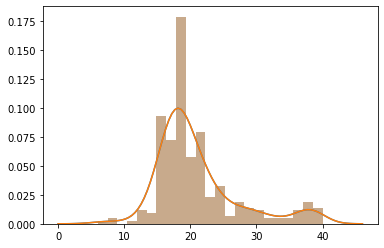

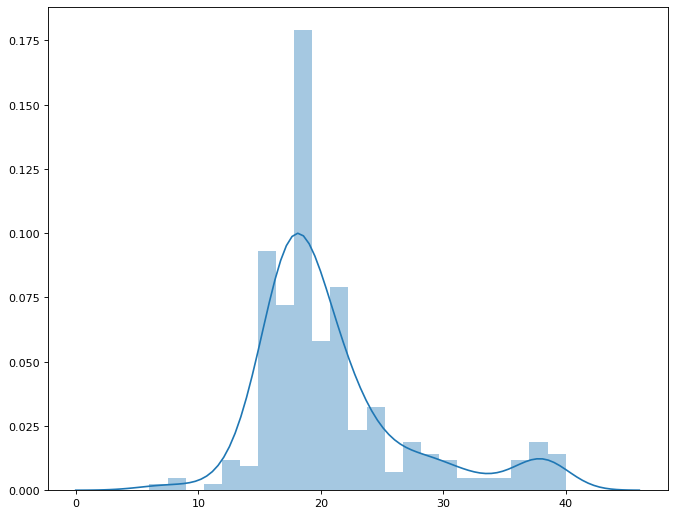

In [7]:


standard_sci = [ t['standard'] for t in trainingDats ]
ar = [ t for t in ar if type(t) is type({})]
ar = [ t for t in ar if 'standard' in t.keys()]
xys = [ (h.get_x(),h.get_height()) for h in sns.distplot(standard_sci).patches ]

x_grid = [ h.get_x() for h in sns.distplot(standard_sci).patches ]
offset = float((x_grid[1] - x_grid[0])/2.0)
bin_centers = [gr+offset for gr in x_grid]
# this plot not used yet.

fig = plt.figure(figsize=(10, 8), dpi=80)
ax1 = fig.add_subplot(111)#)
mean_ = np.mean([a['standard'] for a in ar])
min_ = np.min([a['standard'] for a in ar])
max_ = np.max([a['standard'] for a in ar])
std_ = np.std([a['standard'] for a in ar])
stats_items = [mean_,min_,max_]

g = sns.distplot(standard_sci, label="Readability Index")


histogram_content = [x[0] for x in xys]
height_content = np.array([x[1] for x in xys])

hc = np.array(histogram_content)

x_sub_set=histogram_content


other_name=str('Phytochromobilin C15-Z,syn - C15-E,anti isomerization: concerted or stepwise?')
worst_height,_ = get_heights([max_ART],hc,x_sub_set)
mwp_height,_ = get_heights([mwp],hc,x_sub_set)

#bmark_max_art
worst_height = worst_height[0]
#bmark_stats_items_grid = snap_to_grid(bmark_stats_items,bin_centers)

#worst_distamnce = snap_to_grid(max_ART,bin_centers)
worst_distance = snap_to_grid([max_ART],bin_centers)
mwp_distance = snap_to_grid([mwp],bin_centers)


bmark_stats_items = [ b['standard'] for b in bmark ]
#bmark_stats_items.append(max_ART)
categories = ["upgoer 5", "Readibility Declining Over Time","Science of Writing","Post Modern Essay Generator"]#"Mean Wikipedia"]#,other_name]# "wikipedia science"]
bmark_heights, _ = get_heights(bmark_stats_items,histogram_content,x_sub_set)
heights, bwo = get_heights(stats_items,histogram_content,x_sub_set)
#bmark_heights.append(worst_height)
bmark_stats_items = [i+bwo for i in bmark_stats_items]
mean_a = mean_
min_a = min_ 
max_a = max_ 
xticks = list(range(0,45,5))

#print(xticks)
bmark_stats_items

In [8]:

bmark_stats_items_grid = snap_to_grid(bmark_stats_items,bin_centers)
author_stats =[i for i in [mean_,min_,max_]]
author_stats_grid = snap_to_grid(author_stats,bin_centers)
mean_a_grid = snap_to_grid([mean_a],bin_centers)
x_sub_set_grid = snap_to_grid(x_sub_set,bin_centers)


In [9]:
recalibrate_heights,b = get_heights(author_stats_grid,hc,x_sub_set)

heights[0] = np.max(recalibrate_heights)
heights[2] = recalibrate_heights[2]


In [10]:
np.max(height_content)
heights

[0.17899737214473446, 0.009298564786739431, 0.018597129573478904]

In [11]:
bmark_heights
print(len(bmark_heights))
print(len(bin_centers))
print(len(bmark_stats_items))

6
46
6


In [12]:
print(len(bmark_stats_items_grid))

6


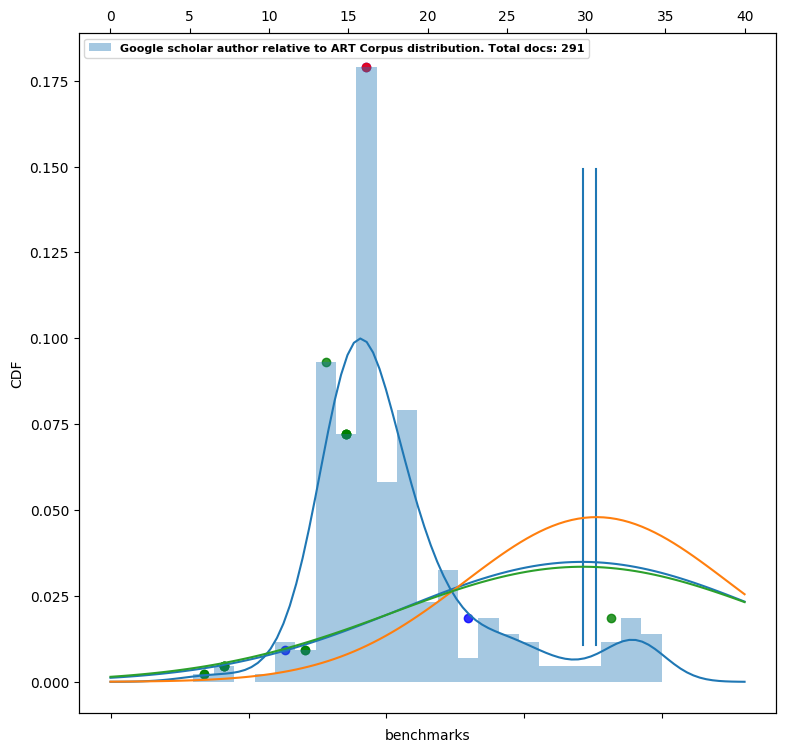

In [23]:
fig = plt.figure(figsize=(9, 9), dpi=100)
ax1 = fig.add_subplot(111)#)
g = sns.distplot(standard_sci, label="Readability Index")

benchmarks = pd.DataFrame({
'benchmarks': bmark_stats_items_grid,
    'CDF': bmark_heights
    })


data0 = pd.DataFrame({
'mean, min, maximum': author_stats_grid,
    'CDF': heights
    })


data2 = pd.DataFrame({
'Standard Reading Level': mean_a_grid,
    'CDF': np.max(height_content)
    })




legend_properties = {'weight':'bold','size':8}

ax = sns.regplot(data=benchmarks, x="benchmarks", y="CDF", fit_reg=False, marker="o", color="green")


ax = sns.regplot(data=data0, x="mean, min, maximum", y="CDF", fit_reg=False, marker="o", color="blue")
#ax = sns.regplot(x='Standard Reading Level', y='CDF',data=data1, fit_reg=False, marker="o", color="green")#, data=fmri)
ax = sns.regplot(data=data2, x="Standard Reading Level", y="CDF", fit_reg=False, marker="o", color="red")

legendMain=ax.legend(labels=[str("std deviation")], prop=legend_properties,loc='upper right')

legendSide0=ax.legend(labels=[NAME],prop=legend_properties,loc='center right')
legendSide1=ax.legend(labels=[str('Number of Documents: '+str(len(ar)))],prop=legend_properties,loc='upper left')


legendMain=ax.legend(labels=[str("Google scholar author relative to ART Corpus distribution. Total docs: ")+str(len(trainingDats))], prop=legend_properties,loc='upper left')


#for i,j,k in zip(author_stats_grid,heights,[str(NAME)+' mean',str(NAME)+' min',str(NAME)+' max']):
'''
xinterval = author_stats_grid
xinterval.extend(bmark_stats_items_grid)
#xinterval.append(other)
#coords = copy.copy([item for item in ax.get_xticklabels()])
xinterval.insert(4,x1)
ax.set_xticks(xinterval)
'''
x1,y1,z1 = (mwp_distance[0],mwp_height[0],str('mean wikipedia'))


new_categories = []

#new_categories.extend([str(NAME)+' mean',str(NAME)+' min',str(NAME)+' max'])
#new_categories.extend(categories)
#new_categories.insert(4,'Mean Wikipedia Biological Science')
x,y,z = (worst_distance[0],worst_height,other_name)

data3 = pd.DataFrame({
'Standard Reading Level': [x,x1],
    'CDF': [y,y1]
    })
ax = sns.regplot(data=data3, x='Standard Reading Level', y="CDF", fit_reg=False, marker="o", color="green")

#new_categories.append(other_name)

ax.set_xticklabels(new_categories, minor=False, rotation=90)
ax.set_xticklabels(new_categories, minor=True, rotation=0)

ax = sns.regplot(data=benchmarks, x="benchmarks", y="CDF", fit_reg=False, marker="o", color="green")

ax2 = plt.twiny()

#plt.axvline(rick, 0.01,0.8)
plt.axvline(scrook, 0.1,0.8)
plt.axvline(grayden, 0.1,0.8)

from scipy.stats import norm
xx = np.linspace(0,40,100)
yy = norm.pdf(xx, loc=rick, scale=ricks)
plt.plot(xx,yy)

xxx = np.linspace(0,40,100)
yyy = norm.pdf(xx, loc=scrook, scale=scrooks)
plt.plot(xxx,yyy)

xxxx = np.linspace(0,40,100)
yyyy = norm.pdf(xx, loc=grayden, scale=graydens)
plt.plot(xxxx,yyyy)

#ax = sns.regplot(data=yyyy, x="benchmarks", y="CDF", fit_reg=False, marker="o", color="green")


#ax = sns.regplot(data=data5, x="winner", y="std", fit_reg=False, marker="o", color="green")


#pdf = stats.norm.pdf(data, rick, ricks)

xticks = list(range(0,45,5))

plt.xticks(xticks)
#ax2.xaxis.set_minor_locator(AutoMinorLocator(4))
plt.tick_params(axis="y", labelcolor="r", pad=8)


#data_m = [{"R. Gerkin":rick},{"S. Crook":scrook},{"D. Grayden":grayden}]#,{"S. Baer":smbaer}]
#data_s = [{"R. Gerkin":ricks},{"S. Crook":scrooks},{"D. Grayden":graydens}]#,{"S. Baer":smbaer}]



#ax.text(x-0.25,y+0.005,z, rotation=90)  

#ax.text(x1,y1,z1, rotation=90)  

    
plt.savefig(str(NAME)+'_author_readability.png')
plt.show()



In [ ]:

plt.savefig(str(NAME)+'_author_readability.png')

new_categories
x,y,z = (worst_distance[0],worst_height,other_name)
x
y
z

In [ ]:
x,y,z = (mwp_distance[0],mwp_height[0],str('mean wikipedia'))


In [ ]:
xticks
xinterval

In [ ]:
data2
grayden

scrook
rick
grayden

In [ ]:
data0

In [ ]:
bmark_stats_items

In [ ]:
#bmark

In [ ]:
trainingDats[-1]